![Header.jpeg](../assets/banner_linreg.png)

# Analisis dan Prediksi Konsumsi Energi pada Bangunan Menggunakan Algoritma *Ridge*, *Lasso* dan *Elastic Net Regression*

---

<h2>Daftar isi</h2>

- <a href=#bu>Business Understanding</a>
- <a href=#du>Data Understanding</a>
- <a href=#dp>Data Preparation</a>
- <a href=#ml>Modeling</a>
- <a href=#ev>Evaluation</a>
- <a href=#dy>Deployment</a>


<hr>


<h2 id='bu'>Business Understanding</h2>

Dataset "Energy Consumption" digunakan untuk memahami pola konsumsi energi pada bangunan berdasarkan karakteristiknya. Dengan informasi ini, pemilik atau pengelola dapat memperkirakan kebutuhan energi, mengestimasi biaya, serta mengoptimalkan penggunaan energi agar lebih efisien.

Dataset ini terdiri dari 7 macam fitur yang terbagi menjadi dua jenis data yaitu data latih dan data uji, yang masing-masing berjumlah 1000 baris data uji dan 100 baris data latih. Kolom-kolom pada dataset ini terdiri dari:

1. **Building Type** : Fitur untuk menjelaskan kategori bangunan
2. **Square Footage** : Fitur yang merepresentasikan luas bangunan dalam satuan meter persegi
3. **Number of Occupation** : Fitur yang memberikan informasi mengenai banyak penghuni dengan tipe data  
4. **Appliances Used** : Fitur yang memberikan informasi mengenai jumlah peralatan yang ada
5. **Average Temparature** : Fitur mengenai rata-rata suhu dalam satuan derajat celcius
6. **Day of Week** : Fitur ini menunjukkan data point diambil selama hari kerja (weekday) atau akhir pekan (weekend)
7. **Energy Consumption** : Fitur target mengenai banyaknya energi yang dikonsumsi dalam satuan kWh (Kilowatt-hours)

Untuk membangun model prediksi digunakan tiga algoritma linear regression dengan regularisasi: Ridge (mengecilkan semua koefisien tanpa menghapus fitur), Lasso (dapat menghilangkan fitur kurang relevan melalui feature selection), dan ElasticNet (kombinasi Ridge dan Lasso, cocok untuk fitur yang saling berkorelasi). Perbandingan ketiganya membantu memilih model paling sesuai serta memahami peran tiap variabel dalam konsumsi energi.

###**Data Source:**
https://www.kaggle.com/datasets/govindaramsriram/energy-consumption-dataset-linear-regression

<hr>

<h2 id='du'>Data Understanding</h2>

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import ElasticNet, LassoCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

In [27]:
df_train = pd.read_csv("/content/test_energy_data.csv")
df_train.tail()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39
99,Residential,42414,72,24,29.62,Weekday,4722.59


In [28]:
df_test = pd.read_csv("/content/test_energy_data.csv")
df_test.tail()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39
99,Residential,42414,72,24,29.62,Weekday,4722.59


Karena kedua dataset memiliki fitur dan karakteristik isi yang serupa, maka akan dilakukan proses concatenation untuk memperoleh gambaran keseluruhan karakteristik data

In [29]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.tail()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
195,Commercial,1161,81,11,15.45,Weekend,3010.81
196,Residential,37943,50,23,21.73,Weekend,4248.49
197,Commercial,1558,27,29,16.86,Weekend,2843.60
198,Industrial,2145,56,12,11.77,Weekend,3348.39
199,Residential,42414,72,24,29.62,Weekday,4722.59


### Checking Data Dist

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        200 non-null    object 
 1   Square Footage       200 non-null    int64  
 2   Number of Occupants  200 non-null    int64  
 3   Appliances Used      200 non-null    int64  
 4   Average Temperature  200 non-null    float64
 5   Day of Week          200 non-null    object 
 6   Energy Consumption   200 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 11.1+ KB


In [31]:
df.describe(include="all")

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
count,200,200.000000,200.000000,200.000000,200.000000,200,200.000000
unique,3,NaN,NaN,NaN,NaN,2,NaN
top,Residential,NaN,NaN,NaN,NaN,Weekend,NaN
freq,80,NaN,NaN,NaN,NaN,112,NaN
mean,NaN,25881.920000,47.230000,26.970000,22.043300,NaN,4187.578300
std,NaN,13676.581939,29.830292,14.202028,6.940447,NaN,830.465356
min,NaN,1161.000000,2.000000,1.000000,10.400000,NaN,2351.970000
25%,NaN,14161.000000,21.000000,16.750000,15.682500,NaN,3621.925000
50%,NaN,27582.500000,47.000000,27.500000,21.970000,NaN,4249.390000
75%,NaN,38109.500000,73.000000,39.250000,27.492500,NaN,4797.175000


### Checking Data Validity

#### NULL

In [32]:
df.isna().sum()

,0
Building Type,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Day of Week,0
Energy Consumption,0


#### Duplicates

In [33]:
df.duplicated().sum()

np.int64(100)

#### Outliers

In [34]:
df_check_ol = df.select_dtypes(exclude=["object"])

q1 = df_check_ol.quantile(.25)
q3 = df_check_ol.quantile(.75)
iqr = q3 - q1
low_bound = q1 - (1.5 * iqr)
up_bound = q3 + (1.5 * iqr)

ol = ((df_check_ol < low_bound) | (df_check_ol > up_bound))
ol.sum()

,0
Square Footage,0
Number of Occupants,0
Appliances Used,0
Average Temperature,0
Energy Consumption,0


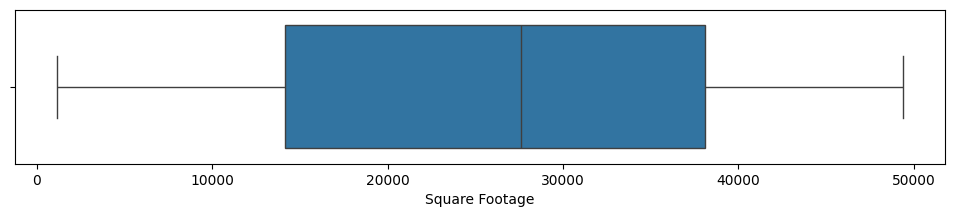

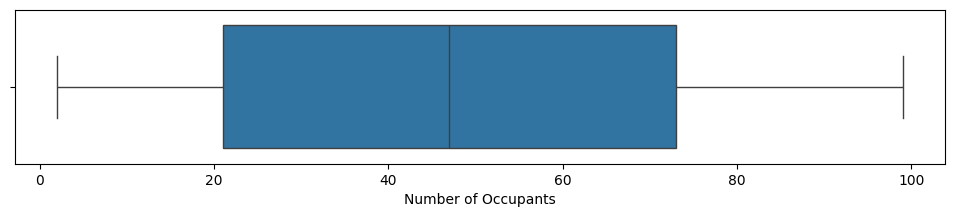

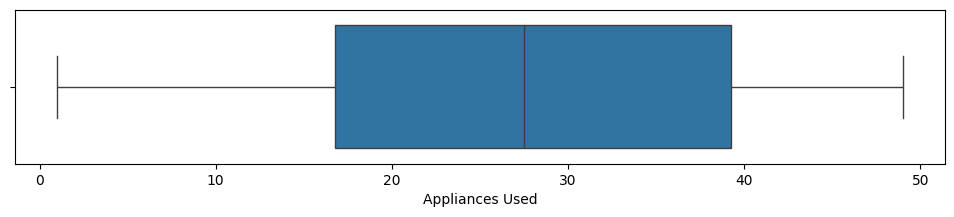

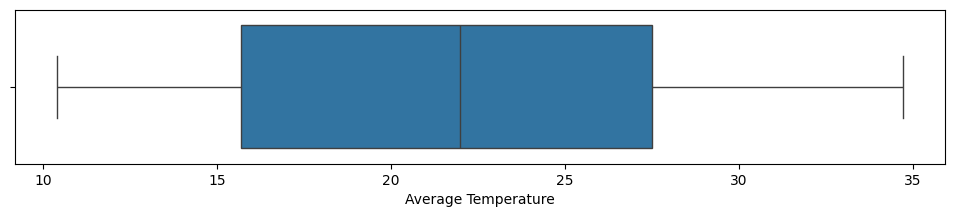

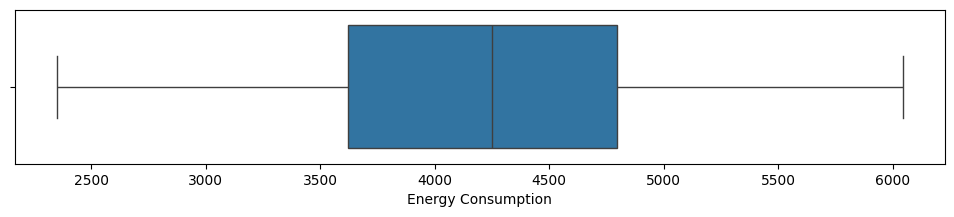

In [35]:
for x in df_check_ol:
    plt.figure(figsize=(12, 2))
    sns.boxplot(data=df_check_ol, x=x)

plt.show()

### Dist of All Object Features

In [36]:
def dist_obj_cols(feature: str):
    ax = sns.histplot(x=df[feature])

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + (p.get_width() / 2), p.get_height()),
                    ha='center', va='bottom', fontsize=12)

    plt.title(feature)
    plt.show()

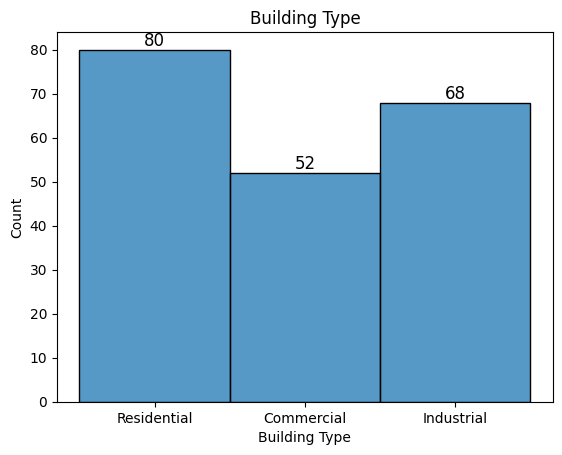

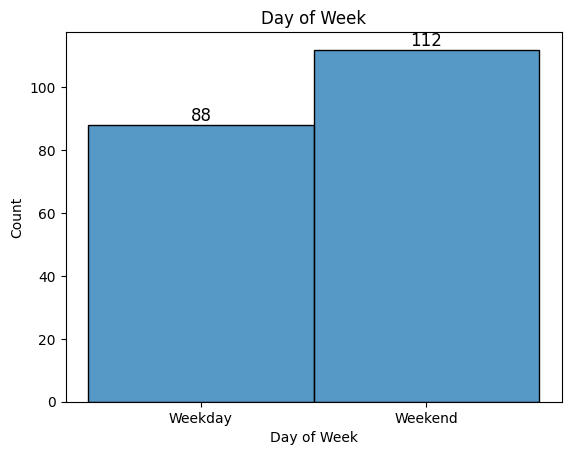

In [37]:
for x in df.columns:
    if df[x].dtype == "object":
        dist_obj_cols(x)

### Dist of All Numeric Features

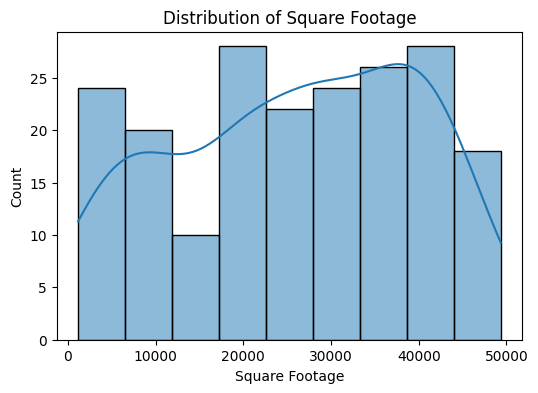

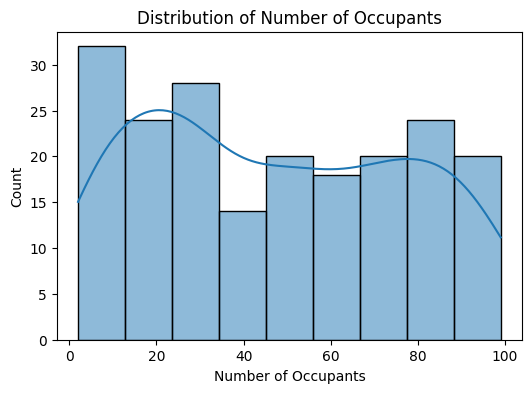

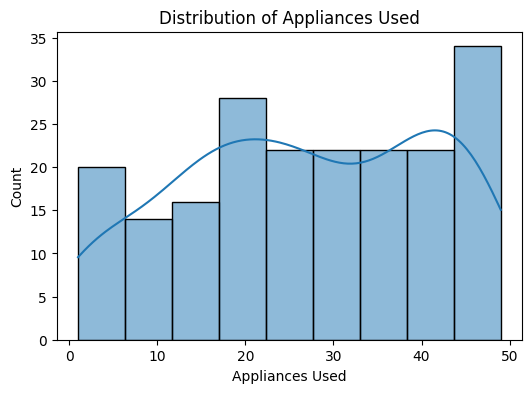

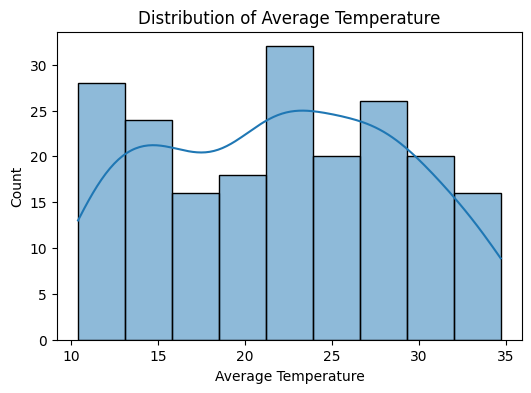

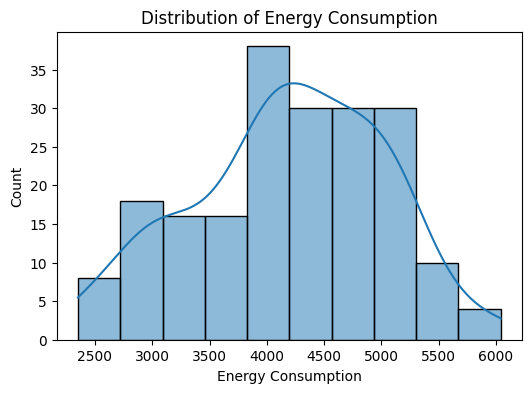

In [38]:
for x in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[x], kde=True)
    plt.title(f'Distribution of {x}')
    plt.show()

### Checking Corr

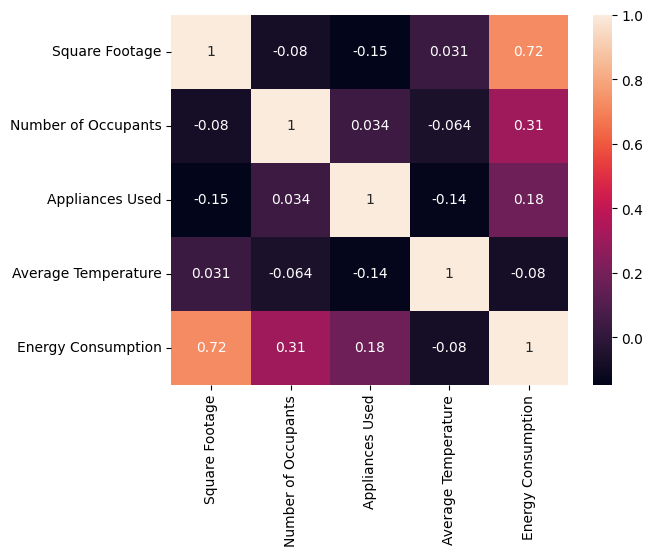

In [39]:
sns.heatmap(
    data=df.select_dtypes(exclude=["object"]).corr(),
    annot=True
);

<hr>

<h2 id='du'>Data Preparation</h2>

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        200 non-null    object 
 1   Square Footage       200 non-null    int64  
 2   Number of Occupants  200 non-null    int64  
 3   Appliances Used      200 non-null    int64  
 4   Average Temperature  200 non-null    float64
 5   Day of Week          200 non-null    object 
 6   Energy Consumption   200 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 11.1+ KB


### One-Hot Encoding

In [41]:
df.select_dtypes(include=["object"]).columns

Index(['Building Type', 'Day of Week'], dtype='object')

In [42]:
df_encoded = pd.get_dummies(
    data=df,
    columns=df.select_dtypes(include=["object"]).columns
)

df_encoded.tail()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
195,1161,81,11,15.45,3010.81,True,False,False,False,True
196,37943,50,23,21.73,4248.49,False,False,True,False,True
197,1558,27,29,16.86,2843.60,True,False,False,False,True
198,2145,56,12,11.77,3348.39,False,True,False,False,True
199,42414,72,24,29.62,4722.59,False,False,True,True,False


In [43]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Square Footage             200 non-null    int64  
 1   Number of Occupants        200 non-null    int64  
 2   Appliances Used            200 non-null    int64  
 3   Average Temperature        200 non-null    float64
 4   Energy Consumption         200 non-null    float64
 5   Building Type_Commercial   200 non-null    bool   
 6   Building Type_Industrial   200 non-null    bool   
 7   Building Type_Residential  200 non-null    bool   
 8   Day of Week_Weekday        200 non-null    bool   
 9   Day of Week_Weekend        200 non-null    bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 8.9 KB


### Cast all dtypes to float64

In [44]:
new_df = df_encoded.astype("float64")
new_df.tail(1)

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
199,42414.0,72.0,24.0,29.62,4722.59,0.0,0.0,1.0,1.0,0.0


In [45]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Square Footage             200 non-null    float64
 1   Number of Occupants        200 non-null    float64
 2   Appliances Used            200 non-null    float64
 3   Average Temperature        200 non-null    float64
 4   Energy Consumption         200 non-null    float64
 5   Building Type_Commercial   200 non-null    float64
 6   Building Type_Industrial   200 non-null    float64
 7   Building Type_Residential  200 non-null    float64
 8   Day of Week_Weekday        200 non-null    float64
 9   Day of Week_Weekend        200 non-null    float64
dtypes: float64(10)
memory usage: 15.8 KB


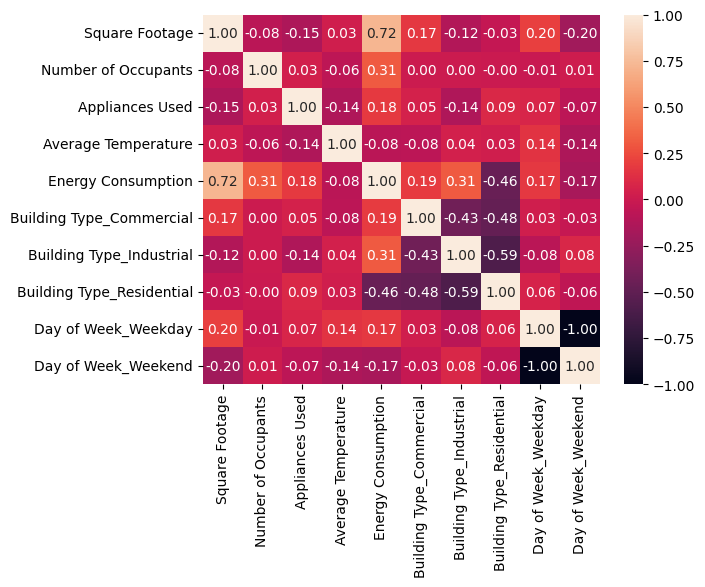

In [46]:
sns.heatmap(new_df.corr(), annot=True, fmt=".2f");

<hr>

### Data Splitting

In [47]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Square Footage             200 non-null    float64
 1   Number of Occupants        200 non-null    float64
 2   Appliances Used            200 non-null    float64
 3   Average Temperature        200 non-null    float64
 4   Energy Consumption         200 non-null    float64
 5   Building Type_Commercial   200 non-null    float64
 6   Building Type_Industrial   200 non-null    float64
 7   Building Type_Residential  200 non-null    float64
 8   Day of Week_Weekday        200 non-null    float64
 9   Day of Week_Weekend        200 non-null    float64
dtypes: float64(10)
memory usage: 15.8 KB


In [48]:
X = new_df.drop(columns="Energy Consumption")
y = new_df["Energy Consumption"]

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Square Footage             200 non-null    float64
 1   Number of Occupants        200 non-null    float64
 2   Appliances Used            200 non-null    float64
 3   Average Temperature        200 non-null    float64
 4   Building Type_Commercial   200 non-null    float64
 5   Building Type_Industrial   200 non-null    float64
 6   Building Type_Residential  200 non-null    float64
 7   Day of Week_Weekday        200 non-null    float64
 8   Day of Week_Weekend        200 non-null    float64
dtypes: float64(9)
memory usage: 14.2 KB


In [50]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: Energy Consumption
Non-Null Count  Dtype  
--------------  -----  
200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [52]:
X_train.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
79,40337.0,9.0,27.0,16.96,1.0,0.0,0.0,1.0,0.0
197,1558.0,27.0,29.0,16.86,1.0,0.0,0.0,0.0,1.0
38,2743.0,3.0,42.0,20.36,0.0,0.0,1.0,0.0,1.0
24,42767.0,40.0,28.0,17.94,0.0,1.0,0.0,0.0,1.0
122,42729.0,20.0,17.0,11.91,0.0,1.0,0.0,0.0,1.0


In [53]:
X_test.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
95,1161.0,81.0,11.0,15.45,1.0,0.0,0.0,0.0,1.0
15,8157.0,10.0,37.0,25.96,0.0,0.0,1.0,1.0,0.0
30,27708.0,47.0,24.0,11.26,0.0,1.0,0.0,0.0,1.0
158,40542.0,31.0,19.0,12.01,1.0,0.0,0.0,1.0,0.0
128,27582.0,24.0,24.0,29.99,1.0,0.0,0.0,1.0,0.0


In [54]:
X_train.shape, X_test.shape

((160, 9), (40, 9))

### Feature Scaling

In [55]:
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)

# # Dump Scaler
# joblib.dump(scaler, "../models/scaler_minmax_fnb1.joblib")

# X_test_scaled = scaler.transform(X_test)

In [58]:
from sklearn.preprocessing import StandardScaler
import joblib
import os

# Buat folder "../models" kalau belum ada
os.makedirs("../models", exist_ok=True)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dump Scaler
joblib.dump(scaler, "../models/scaler_standardscaler.joblib")

print("Scaler berhasil disimpan ke '../models/scaler_standardscaler.joblib'")


Scaler berhasil disimpan ke '../models/scaler_standardscaler.joblib'


In [59]:
X_train_scaled[:5]

array([[ 0.99680855, -1.28845537,  0.03715569, -0.74564213,  1.64952424,
        -0.68402479, -0.83793058,  1.16316   , -1.16316   ],
       [-1.84235568, -0.67164163,  0.17870117, -0.76004319,  1.64952424,
        -0.68402479, -0.83793058, -0.85972695,  0.85972695],
       [-1.75559714, -1.49405995,  1.09874682, -0.25600593, -0.60623541,
        -0.68402479,  1.19341628, -0.85972695,  0.85972695],
       [ 1.17471848, -0.22616504,  0.10792843, -0.60451169, -0.60623541,
         1.46193533, -0.83793058, -0.85972695,  0.85972695],
       [ 1.17193635, -0.91151364, -0.67057173, -1.4728959 , -0.60623541,
         1.46193533, -0.83793058, -0.85972695,  0.85972695]])

In [60]:
X_test_scaled[:5]

array([[-1.87142163,  1.1787996 , -1.09520818, -0.96309821,  1.64952424,
        -0.68402479, -0.83793058, -0.85972695,  0.85972695],
       [-1.35921675, -1.25418794,  0.74488311,  0.5504537 , -0.60623541,
        -0.68402479,  1.19341628,  1.16316   , -1.16316   ],
       [ 0.07218942,  0.01370697, -0.17516254, -1.56650282, -0.60623541,
         1.46193533, -0.83793058, -0.85972695,  0.85972695],
       [ 1.01181741, -0.53457191, -0.52902625, -1.45849483,  1.64952424,
        -0.68402479, -0.83793058,  1.16316   , -1.16316   ],
       [ 0.06296446, -0.77444392, -0.17516254,  1.13081661,  1.64952424,
        -0.68402479, -0.83793058,  1.16316   , -1.16316   ]])

In [61]:
y_test[:5]

,Energy Consumption
95,3010.81
15,2668.06
30,4779.08
158,4707.07
128,3999.14


In [62]:
np.save("../models/X_test_scaled.npy", X_test_scaled)
np.save("../models/y_test.npy", y_test)

<h2 id='ml'>Modeling</h2>

### Training

#### ElasticNet Model

In [63]:
elastic_model = ElasticNet(max_iter=4000)

param_elastic_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.4, 0.5, 0.7, 0.9, 0.95]
}

grid_elastic = GridSearchCV(
    estimator=elastic_model,
    param_grid=param_elastic_grid,
    cv=5,
    scoring="neg_mean_squared_error"
)

grid_elastic.fit(X_train_scaled, y_train)

print(f"ElasticNet Best Score: {grid_elastic.best_score_:.3f}")
print(f"ElasticNet Best Params: {grid_elastic.best_params_}")

best_elastic = grid_elastic.best_estimator_
y_pred_elastic = best_elastic.predict(X_test_scaled)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.964e+03, tolerance: 8.359e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.718e+03, tolerance: 7.850e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.461e+03, tolerance: 7.684e

ElasticNet Best Score: -0.000
ElasticNet Best Params: {'alpha': 0.0001, 'l1_ratio': 0.95}


In [64]:
mse_elastic =  mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)

mse_elastic, r2_elastic, mae_elastic

(0.0002817639388862147, 0.9999999996626644, 0.01399359184339346)

#### Lasso Model

In [72]:
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)
lasso_cv.fit(X_train_scaled, y_train)

print("Lasso Best alpha:", lasso_cv.alpha_)

lasso_model = Lasso(alpha=lasso_cv.alpha_)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

Lasso Best alpha: 0.001


#### Ridge Model

In [73]:
ridge = Ridge()
param_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_ridge,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_ridge.fit(X_train_scaled, y_train)

print("Ridge Best alpha:", grid_ridge.best_params_['alpha'])

best_ridge = grid_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

Ridge Best alpha: 0.0001


<hr>

<h2 id='ml'>Evaluation</h2>

In [74]:
metrics_df = pd.DataFrame({
    "Model": ["ElasticNet", "Lasso", "Ridge"],
    "MSE": [mse_elastic, mse_lasso, mse_ridge],
    "MAE": [mae_elastic, mae_lasso, mae_ridge],
    "R2": [r2_elastic, r2_lasso, r2_ridge]
})

print(metrics_df)

        Model       MSE       MAE   R2
0  ElasticNet  0.000282  0.013994  1.0
1       Lasso  0.000229  0.012059  1.0
2       Ridge  0.000182  0.010971  1.0


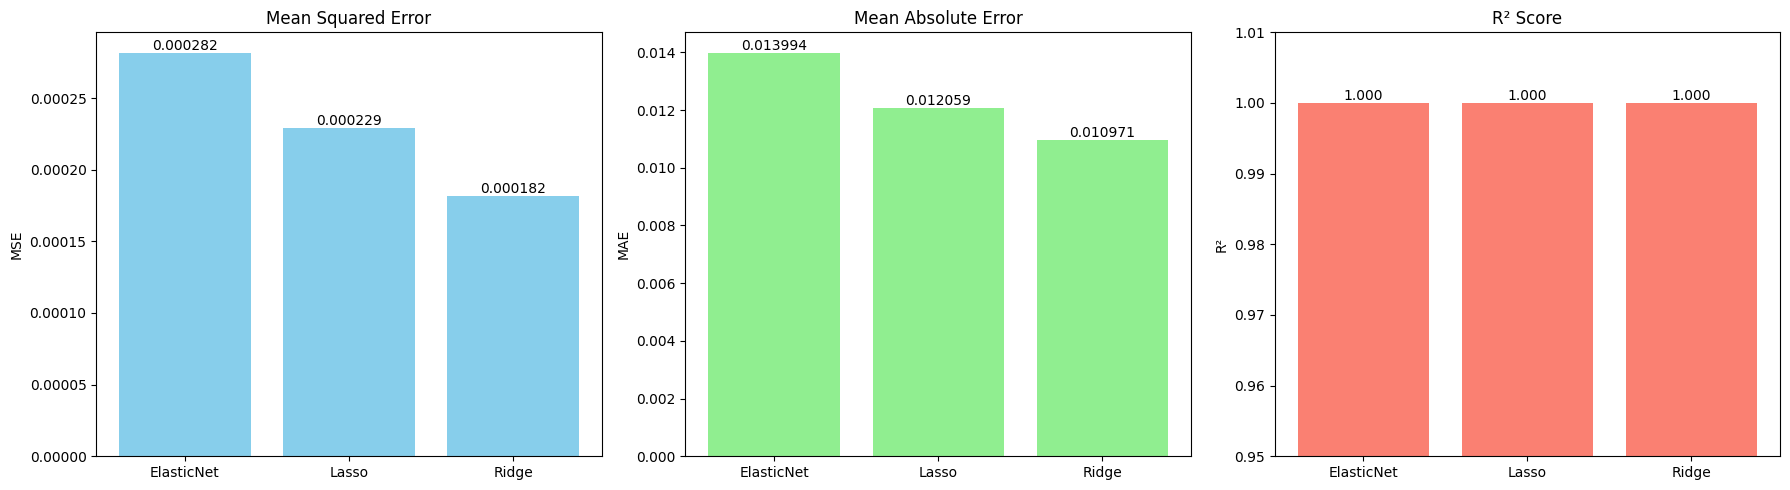

In [79]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# --- MSE ---
axs[0].bar(metrics_df["Model"], metrics_df["MSE"], color="skyblue")
axs[0].set_title("Mean Squared Error")
axs[0].set_ylabel("MSE")
for i, v in enumerate(metrics_df["MSE"]):
    axs[0].text(i, v, f"{v:.6f}", ha='center', va='bottom')

# --- MAE ---
axs[1].bar(metrics_df["Model"], metrics_df["MAE"], color="lightgreen")
axs[1].set_title("Mean Absolute Error")
axs[1].set_ylabel("MAE")
for i, v in enumerate(metrics_df["MAE"]):
    axs[1].text(i, v, f"{v:.6f}", ha='center', va='bottom')

# --- R² ---
axs[2].bar(metrics_df["Model"], metrics_df["R2"], color="salmon")
axs[2].set_title("R² Score")
axs[2].set_ylabel("R²")
axs[2].set_ylim(0.95, 1.01)  # zoom biar kelihatan perbedaan antar model
for i, v in enumerate(metrics_df["R2"]):
    axs[2].text(i, v, f"{v:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

<hr>

<h2 id='ml'>Deployment</h2>

In [76]:
joblib.dump(best_elastic, "../models/model_elasticnet.joblib")
joblib.dump(lasso_model, "../models/model_lasso.joblib")
joblib.dump(best_ridge, "../models/model_ridge.joblib")

['../models/model_ridge.joblib']



---


Copyright © 2025 by DGX Development Team, Gunadarma University


https://www.hpc-hub.gunadarma.ac.id/